In [1]:
import pandas as pd
import numpy as np
from parametros import *
import sys, os
sys.path.append(os.path.join(os.path.dirname(file), "..", ".."))
from prepro_py import preprocesamiento_naive
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.naive_bayes import CategoricalNB
os.chdir("../../../../")

In [2]:
to_csv = False
return_something = True
feature_selection = False
seek_correlation = None

In [3]:
y_data_style = "h1n1"
x_data, y_data, test = preprocesamiento_naive(
    PAHT_OUTPUT,
    features_keep=features_keep,
    features_drop=features_drop,
    y_data_style=y_data_style,
    features_NA_as_cat=features_NA_as_cat,
    imputation_method=imputation_method,
    n_estimators=n_estimators,
    criterion=criterion,
    feature_selection=feature_selection,
    seek_correlation=seek_correlation,
    to_csv=to_csv,
    return_something=return_something,
    sc_max_depth=sc_max_depth,
    print_cor=print_cor,
    value=1000,
    sampling=sampling
    )

Hay 26707 filas y 19642 no tienen NaN
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Hay 26708 filas y 19592 no tienen NaN
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [4]:
x_data.drop("respondent_id", axis=1, inplace=True)

In [5]:
f_selector = SFS(
    CategoricalNB(),
    k_features=x_data.shape[1], 
    forward=True, 
    floating=False, 
    verbose=2,
    scoring='roc_auc',
    cv=5
    )
f_selector.fit(x_data, np.array(y_data).ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   12.0s finished

[2022-01-12 23:20:10] Features: 1/35 -- score: 0.7014581225777989[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.1s finished

[2022-01-12 23:20:22] Features: 2/35 -- score: 0.7787331350445884[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


In [ ]:
values = pd.DataFrame.from_dict(f_selector.get_metric_dict()).T
values

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(16,)","[0.7085316165945367, 0.6992598867630936, 0.703...",0.702663,"(opinion_h1n1_risk,)",0.006441,0.005011,0.002506
2,"(9, 16)","[0.7860055979702384, 0.7794860464361368, 0.782...",0.779439,"(doctor_recc_h1n1, opinion_h1n1_risk)",0.011538,0.008977,0.004489
3,"(9, 15, 16)","[0.8191621055321058, 0.8071878314828755, 0.818...",0.81189,"(doctor_recc_h1n1, opinion_h1n1_vacc_effective...",0.011127,0.008657,0.004328
4,"(9, 15, 16, 33)","[0.8284434689823652, 0.8146725250238485, 0.824...",0.820322,"(doctor_recc_h1n1, opinion_h1n1_vacc_effective...",0.011861,0.009229,0.004614
5,"(9, 15, 16, 21, 33)","[0.8290281877592307, 0.8167685701091845, 0.826...",0.821845,"(doctor_recc_h1n1, opinion_h1n1_vacc_effective...",0.011945,0.009294,0.004647
6,"(9, 15, 16, 21, 22, 33)","[0.8296290323762893, 0.8167798791399692, 0.827...",0.822556,"(doctor_recc_h1n1, opinion_h1n1_vacc_effective...",0.011453,0.008911,0.004455
7,"(9, 15, 16, 21, 22, 23, 33)","[0.830236369214724, 0.81672469525827, 0.827254...",0.823061,"(doctor_recc_h1n1, opinion_h1n1_vacc_effective...",0.011434,0.008896,0.004448
8,"(9, 14, 15, 16, 21, 22, 23, 33)","[0.8298075684641393, 0.8175198876636276, 0.826...",0.823354,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.011121,0.008652,0.004326
9,"(2, 9, 14, 15, 16, 21, 22, 23, 33)","[0.8295880894963188, 0.8184594796379854, 0.826...",0.823531,"(behavioral_antiviral_meds, doctor_recc_h1n1, ...",0.010716,0.008338,0.004169
10,"(2, 9, 14, 15, 16, 21, 22, 23, 29, 33)","[0.8295670421334698, 0.8191079687828865, 0.826...",0.823718,"(behavioral_antiviral_meds, doctor_recc_h1n1, ...",0.010693,0.00832,0.00416


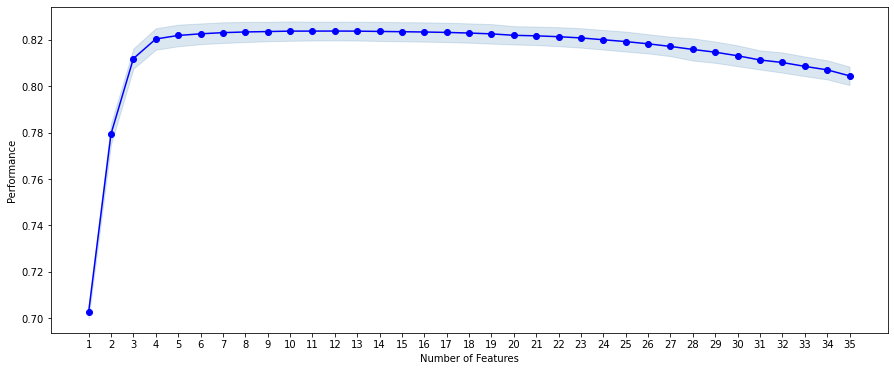

In [ ]:
fig = plot_sfs(f_selector.get_metric_dict(), kind='std_err', figsize=(15,6))

In [12]:
x_data.columns.values[[values.feature_idx[13]]]

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_1172/3693307271.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_data.columns.values[[values.feature_idx[13]]]


array(['behavioral_antiviral_meds', 'behavioral_face_mask',
       'doctor_recc_h1n1', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'age_group',
       'education', 'race', 'marital_status', 'rent_or_own',
       'hhs_geo_region', 'employment_industry'], dtype=object)